# Exercício 1: Perceptrão Simplificado

Implementação direta do perceptrão para operação OR conforme especificado no guião.

**Objetivo**: Implementar perceptrão com duas entradas e uma saída para operação OR
- Equação: o = f(s), onde s = w0 + w1·x1 + w2·x2
- Função de ativação: f(s) = 1 se s > 0.5, 0 caso contrário
- Taxa de aprendizagem: α = 0.01
- Máximo de épocas: 20


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do perceptrão
alpha = 0.05
epochs = 20

# Dados para operação OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d = np.array([0, 1, 1, 1])

np.random.seed(44)
# Inicializar pesos aleatoriamente
w = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos iniciais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Armazenar histórico para visualização
errors_per_epoch = []
weights_per_epoch = []

# Treinamento do perceptrão
for epoch in range(epochs):
    delta_w = np.zeros(3)
    error_epoch = 0
    
    print(f"\nÉpoca {epoch + 1}")
    
    # Para cada padrão de entrada
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calcular soma ponderada
        s = w[0] + w[1]*x1 + w[2]*x2
        
        # Aplicar função de ativação
        o = 1 if s > 0.5 else 0
        
        # Calcular erro
        e = d[i] - o
        error_epoch += abs(e)
        
        # Acumular deltas
        delta_w[0] += alpha * e
        delta_w[1] += alpha * x1 * e
        delta_w[2] += alpha * x2 * e
        
        print(f"  Entrada: ({x1},{x2}) -> s={s:.3f}, saída={o}, erro={e}")
    
    # Atualizar pesos
    w += delta_w
    
    # Armazenar histórico
    errors_per_epoch.append(error_epoch)
    weights_per_epoch.append(w.copy())
    
    print(f"Erro total: {error_epoch}")
    print(f"Delta_w: {delta_w}")
    print(f"Pesos atualizados: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")
    
    # Verificar convergência
    if error_epoch == 0:
        print(f"\nConvergiu na época {epoch + 1}")
        break

print(f"\n=== RESULTADOS FINAIS ===")
print(f"Pesos finais: w0={w[0]:.6f}, w1={w[1]:.6f}, w2={w[2]:.6f}")

# Testar classificação final
print("\nTeste da classificação final:")
correct = 0
for i, (x1, x2) in enumerate(X):
    s_final = w[0] + w[1]*x1 + w[2]*x2
    o_final = 1 if s_final > 0.5 else 0
    status = "CORRETO" if o_final == d[i] else "ERRADO"
    print(f"Entrada: ({x1}, {x2}) -> s={s_final:.6f}, saída={o_final} (desejado: {d[i]}) {status}")
    if o_final == d[i]:
        correct += 1

print(f"\nTaxa de acerto: {correct}/4 = {correct/4*100:.1f}%")

if correct == 4:
    print("Perceptrão aprendeu corretamente")
else:
    print("Perceptrão não convergiu completamente")


Pesos iniciais: w0=0.335, w1=-0.395, w2=0.245

Época 1
  Entrada: (0,0) -> s=0.335, saída=0, erro=0
  Entrada: (0,1) -> s=0.579, saída=1, erro=0
  Entrada: (1,0) -> s=-0.060, saída=0, erro=1
  Entrada: (1,1) -> s=0.184, saída=0, erro=1
Erro total: 2
Delta_w: [0.1  0.1  0.05]
Pesos atualizados: w0=0.435, w1=-0.295, w2=0.295

Época 2
  Entrada: (0,0) -> s=0.435, saída=0, erro=0
  Entrada: (0,1) -> s=0.729, saída=1, erro=0
  Entrada: (1,0) -> s=0.140, saída=0, erro=1
  Entrada: (1,1) -> s=0.434, saída=0, erro=1
Erro total: 2
Delta_w: [0.1  0.1  0.05]
Pesos atualizados: w0=0.535, w1=-0.195, w2=0.345

Época 3
  Entrada: (0,0) -> s=0.535, saída=1, erro=-1
  Entrada: (0,1) -> s=0.879, saída=1, erro=0
  Entrada: (1,0) -> s=0.340, saída=0, erro=1
  Entrada: (1,1) -> s=0.684, saída=1, erro=0
Erro total: 2
Delta_w: [0.   0.05 0.  ]
Pesos atualizados: w0=0.535, w1=-0.145, w2=0.345

Época 4
  Entrada: (0,0) -> s=0.535, saída=1, erro=-1
  Entrada: (0,1) -> s=0.879, saída=1, erro=0
  Entrada: (1,0) -

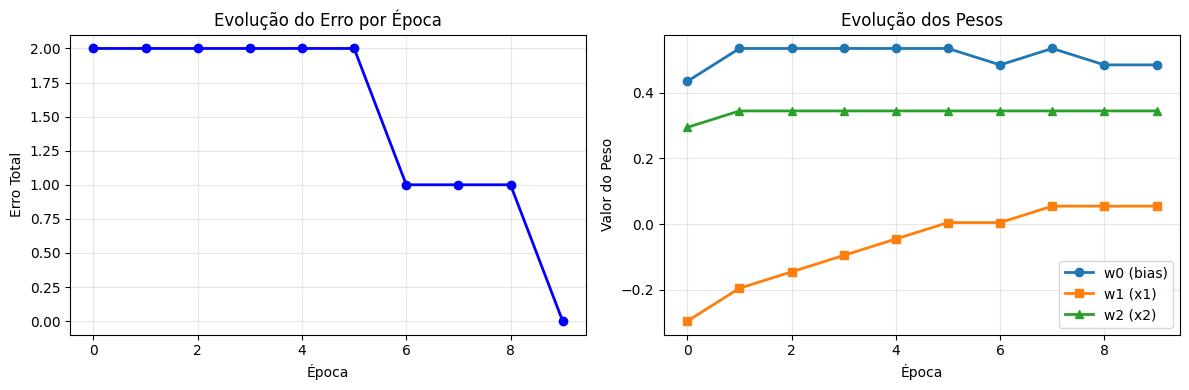


=== ANÁLISE DOS RESULTADOS ===
• Erro inicial: 2
• Erro final: 0
• Épocas necessárias: 10
• Convergência: Sim
• Redução do erro: 2
• Tendência: Decrescente


In [2]:
# Visualizações
plt.figure(figsize=(12, 4))

# Gráfico 1: Evolução do erro
plt.subplot(1, 2, 1)
plt.plot(errors_per_epoch, marker='o', color='blue', linewidth=2)
plt.title('Evolução do Erro por Época')
plt.xlabel('Época')
plt.ylabel('Erro Total')
plt.grid(True, alpha=0.3)

# Gráfico 2: Evolução dos pesos
plt.subplot(1, 2, 2)
weights_per_epoch = np.array(weights_per_epoch)
plt.plot(weights_per_epoch[:, 0], label='w0 (bias)', marker='o', linewidth=2)
plt.plot(weights_per_epoch[:, 1], label='w1 (x1)', marker='s', linewidth=2)
plt.plot(weights_per_epoch[:, 2], label='w2 (x2)', marker='^', linewidth=2)
plt.title('Evolução dos Pesos')
plt.xlabel('Época')
plt.ylabel('Valor do Peso')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise dos resultados
print("\n=== ANÁLISE DOS RESULTADOS ===")
print(f"• Erro inicial: {errors_per_epoch[0]}")
print(f"• Erro final: {errors_per_epoch[-1]}")
print(f"• Épocas necessárias: {len(errors_per_epoch)}")
print(f"• Convergência: {'Sim' if errors_per_epoch[-1] == 0 else 'Não'}")

if len(errors_per_epoch) > 1:
    print(f"• Redução do erro: {errors_per_epoch[0] - errors_per_epoch[-1]}")
    print(f"• Tendência: {'Decrescente' if errors_per_epoch[-1] < errors_per_epoch[0] else 'Estável'}")



=== ANÁLISE DE DIFERENTES VALORES DE ALPHA ===
Objetivo: Comparar a convergência do perceptrão para diferentes taxas de aprendizagem
α = 0.01: 18 épocas, Convergiu: Sim
α = 0.05:  5 épocas, Convergiu: Sim
α = 0.10:  3 épocas, Convergiu: Sim
α = 0.20:  2 épocas, Convergiu: Sim
α = 0.50:  2 épocas, Convergiu: Sim


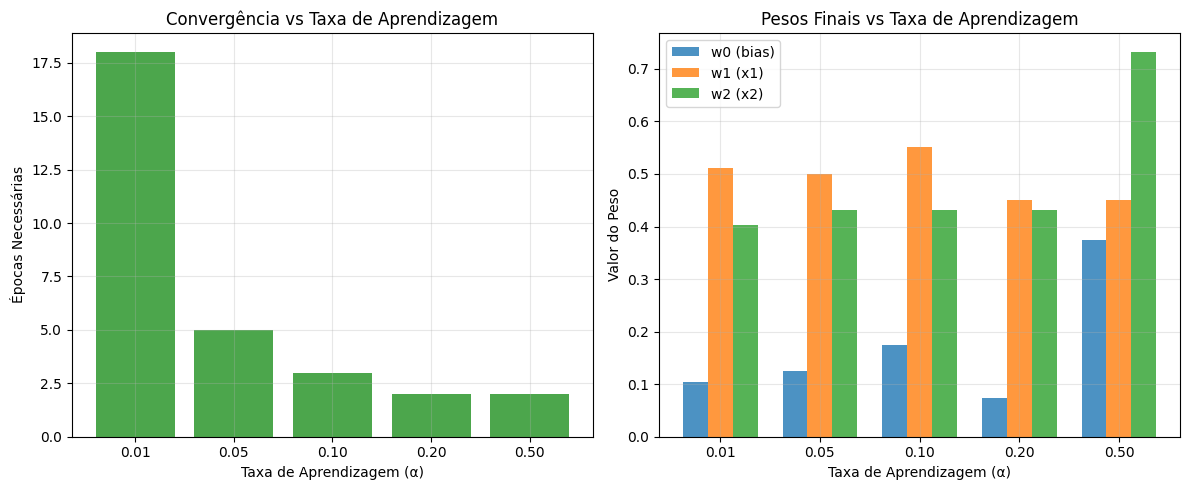


=== ANÁLISE DETALHADA ===
Melhor α: 0.20 (2 épocas)

Pesos finais para cada α:
α = 0.01: w0= 0.105, w1= 0.511, w2= 0.402
α = 0.05: w0= 0.125, w1= 0.501, w2= 0.432
α = 0.10: w0= 0.175, w1= 0.551, w2= 0.432
α = 0.20: w0= 0.075, w1= 0.451, w2= 0.432
α = 0.50: w0= 0.375, w1= 0.451, w2= 0.732


In [3]:
# 6.c - Análise de diferentes valores de alpha
print("\n=== ANÁLISE DE DIFERENTES VALORES DE ALPHA ===")
print("Objetivo: Comparar a convergência do perceptrão para diferentes taxas de aprendizagem")

alphas = [0.01, 0.05, 0.1, 0.2, 0.5]
results = []

for alpha in alphas:
    # Reinicializar pesos para cada teste
    np.random.seed(42)
    w_test = np.random.uniform(-0.5, 0.5, 3)
    
    epochs_needed = 0
    converged = False
    
    for epoch in range(20):
        error_epoch = 0
        
        for i in range(len(X)):
            x1, x2 = X[i]
            s = w_test[0] + w_test[1]*x1 + w_test[2]*x2
            o = 1 if s > 0.5 else 0
            e = d[i] - o
            error_epoch += abs(e)
            
            # Atualizar pesos
            w_test[0] += alpha * e
            w_test[1] += alpha * x1 * e
            w_test[2] += alpha * x2 * e
        
        epochs_needed = epoch + 1
        
        if error_epoch == 0:
            converged = True
            break
    
    results.append({
        'alpha': alpha,
        'epochs': epochs_needed,
        'converged': converged,
        'final_weights': w_test.copy()
    })
    
    print(f"α = {alpha:4.2f}: {epochs_needed:2d} épocas, Convergiu: {'Sim' if converged else 'Não'}")

# Visualização dos resultados
plt.figure(figsize=(12, 5))

# Gráfico 1: Épocas necessárias vs Alpha
plt.subplot(1, 2, 1)
alphas_list = [r['alpha'] for r in results]
epochs_list = [r['epochs'] for r in results]
colors = ['green' if r['converged'] else 'red' for r in results]

plt.bar(range(len(alphas_list)), epochs_list, color=colors, alpha=0.7)
plt.xlabel('Taxa de Aprendizagem (α)')
plt.ylabel('Épocas Necessárias')
plt.title('Convergência vs Taxa de Aprendizagem')
plt.xticks(range(len(alphas_list)), [f'{a:.2f}' for a in alphas_list])
plt.grid(True, alpha=0.3)

# Gráfico 2: Pesos finais para diferentes alphas
plt.subplot(1, 2, 2)
w0_values = [r['final_weights'][0] for r in results]
w1_values = [r['final_weights'][1] for r in results]
w2_values = [r['final_weights'][2] for r in results]

x_pos = np.arange(len(alphas_list))
width = 0.25

plt.bar(x_pos - width, w0_values, width, label='w0 (bias)', alpha=0.8)
plt.bar(x_pos, w1_values, width, label='w1 (x1)', alpha=0.8)
plt.bar(x_pos + width, w2_values, width, label='w2 (x2)', alpha=0.8)

plt.xlabel('Taxa de Aprendizagem (α)')
plt.ylabel('Valor do Peso')
plt.title('Pesos Finais vs Taxa de Aprendizagem')
plt.xticks(x_pos, [f'{a:.2f}' for a in alphas_list])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise dos resultados
print("\n=== ANÁLISE DETALHADA ===")
converged_results = [r for r in results if r['converged']]
if converged_results:
    best_alpha = min(converged_results, key=lambda x: x['epochs'])
    print(f"Melhor α: {best_alpha['alpha']:.2f} ({best_alpha['epochs']} épocas)")
else:
    print("Nenhum α convergiu em 20 épocas")

print("\nPesos finais para cada α:")
for r in results:
    print(f"α = {r['alpha']:4.2f}: w0={r['final_weights'][0]:6.3f}, w1={r['final_weights'][1]:6.3f}, w2={r['final_weights'][2]:6.3f}")


## Parte 2: Geração e Classificação de Dados Gaussianos 2D

**Exercícios 7-10**: Gerar dados gaussianos multivariados e treinar perceptrão para classificação


=== GERAÇÃO DE DADOS GAUSSIANOS 2D ===
Total de pontos: 1000
Distribuição 1 (etiqueta 0): 500 pontos
Distribuição 2 (etiqueta 1): 500 pontos


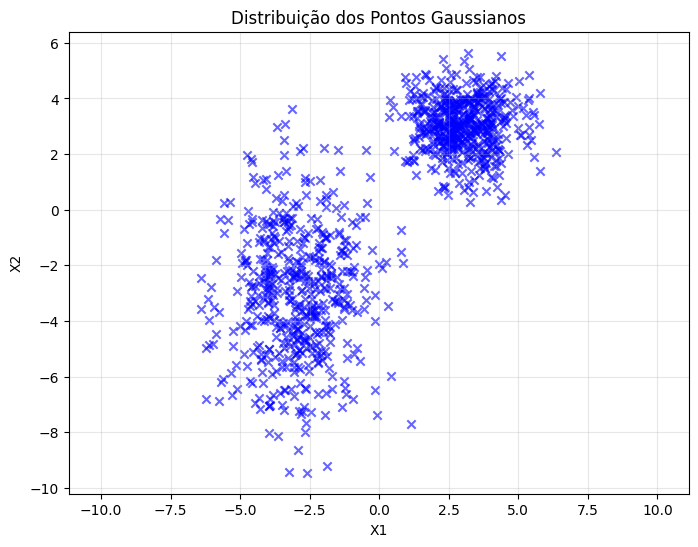

Dados salvos em 'dados_gaussianos_2d.txt'


In [4]:
# Exercício 7: Geração de dados gaussianos 2D
print("=== GERAÇÃO DE DADOS GAUSSIANOS 2D ===")

# Primeira distribuição gaussiana
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T

# Segunda distribuição gaussiana
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T

# Combinar dados
c = np.concatenate((a, b), axis=1)
c = c.T

# Adicionar etiquetas (0 para primeira distribuição, 1 para segunda)
etiqueta_a = np.zeros((500, 1))
etiqueta_b = np.ones((500, 1))
etiquetas = np.vstack((etiqueta_a, etiqueta_b))
c = np.hstack((c, etiquetas))

# Baralhar dados
np.random.shuffle(c)
c = c.T

# Extrair coordenadas e etiquetas
x = c[0]
y = c[1]
labels = c[2]

print(f"Total de pontos: {len(x)}")
print(f"Distribuição 1 (etiqueta 0): {np.sum(labels == 0)} pontos")
print(f"Distribuição 2 (etiqueta 1): {np.sum(labels == 1)} pontos")

# Visualizar dados gerados
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='x', alpha=0.6)
plt.title('Distribuição dos Pontos Gaussianos')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

# Salvar dados
np.savetxt('dados_gaussianos_2d.txt', c.T, fmt='%.3f', delimiter=',', 
           header='x,y,etiqueta', comments='')
print("Dados salvos em 'dados_gaussianos_2d.txt'")

# Preparar dados para treino
data = c[:2].T  # Coordenadas (x, y)
labels = c[2]   # Etiquetas (0 ou 1)



=== EXERCÍCIO 8: TREINO DO PERCEPTRÃO COM DADOS GAUSSIANOS ===
Pesos iniciais: w0=0.343, w1=-0.015, w2=-0.166
Treinando perceptrão por 10 épocas...
  Época 2: Erro = 4.0
  Época 4: Erro = 5.0
  Época 6: Erro = 5.0
  Época 8: Erro = 3.0
  Época 10: Erro = 3.0
Pesos finais: w0=0.455, w1=-0.241, w2=-0.145
Acurácia: 99.7%

=== VISUALIZAÇÃO COM 4 CORES ===


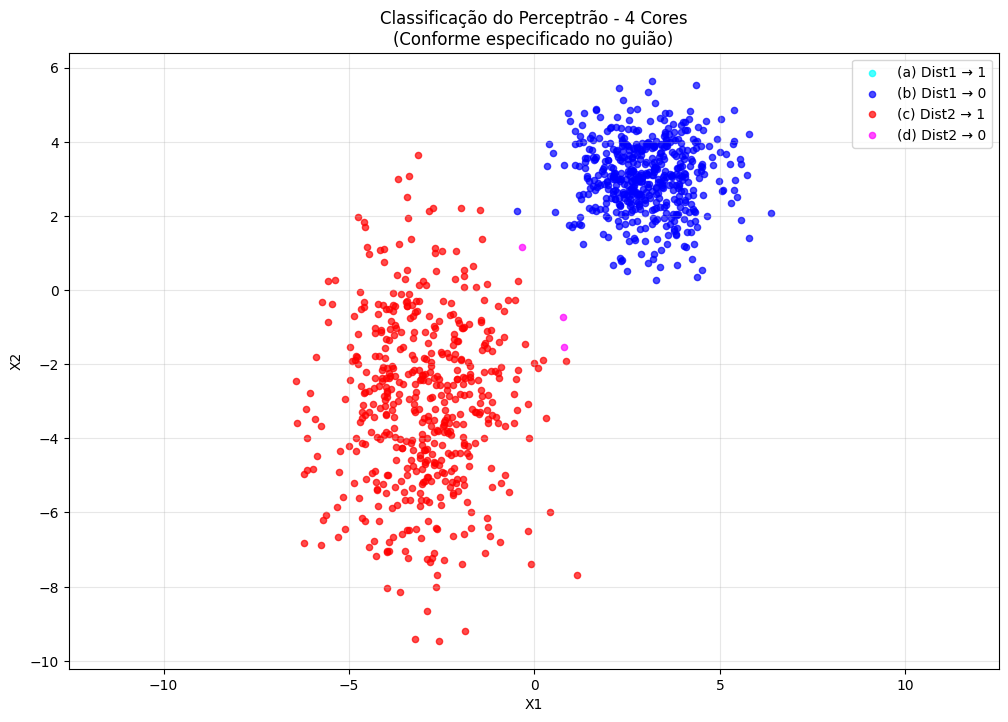


Contagem dos pontos por categoria:
  (a) Dist1 → 1: 0 pontos
  (b) Dist1 → 0: 500 pontos
  (c) Dist2 → 1: 497 pontos
  (d) Dist2 → 0: 3 pontos


In [5]:
# Exercício 8: Treinar perceptrão com dados gaussianos
print("\n=== EXERCÍCIO 8: TREINO DO PERCEPTRÃO COM DADOS GAUSSIANOS ===")

# Parâmetros para dados gaussianos
alpha_gauss = 0.001
epochs_gauss = 10

# Inicializar pesos aleatoriamente
w = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos iniciais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Treinar perceptrão
print(f"Treinando perceptrão por {epochs_gauss} épocas...")
for epoch in range(epochs_gauss):
    delta_w = np.zeros(3)
    total_error = 0
    
    for i in range(len(data)):
        x1, x2 = data[i]
        s = w[0] + w[1]*x1 + w[2]*x2
        o = 1 if s > 0.5 else 0
        e = labels[i] - o
        total_error += abs(e)
        
        delta_w[0] += alpha_gauss * e
        delta_w[1] += alpha_gauss * x1 * e
        delta_w[2] += alpha_gauss * x2 * e
    
    # Atualizar pesos
    w[0] += delta_w[0]
    w[1] += delta_w[1]
    w[2] += delta_w[2]
    
    if (epoch + 1) % 2 == 0:  # Mostrar progresso a cada 2 épocas
        print(f"  Época {epoch + 1}: Erro = {total_error:.1f}")

print(f"Pesos finais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Fazer predições
predictions = []
for i in range(len(data)):
    x1, x2 = data[i]
    s = w[0] + w[1]*x1 + w[2]*x2
    o = 1 if s > 0.5 else 0
    predictions.append(o)

predictions = np.array(predictions)

# Calcular acurácia
accuracy = np.mean(predictions == labels) * 100
print(f"Acurácia: {accuracy:.1f}%")

# Visualização com 4 cores conforme especificado no guião
print("\n=== VISUALIZAÇÃO COM 4 CORES ===")

# Categorizar pontos conforme especificado no guião:
# (a) Pontos gerados pela primeira distribuição e classificados com 1 pelo perceptrão
# (b) Pontos gerados pela primeira distribuição e classificados com 0 pelo perceptrão  
# (c) Pontos gerados pela segunda distribuição e classificados com 1 pelo perceptrão
# (d) Pontos gerados pela segunda distribuição e classificados com 0 pelo perceptrão

mask_a = (labels == 0) & (predictions == 1)  # (a) Dist1 → 1
mask_b = (labels == 0) & (predictions == 0)  # (b) Dist1 → 0
mask_c = (labels == 1) & (predictions == 1)  # (c) Dist2 → 1
mask_d = (labels == 1) & (predictions == 0)  # (d) Dist2 → 0

plt.figure(figsize=(12, 8))
plt.scatter(data[mask_a, 0], data[mask_a, 1], c='cyan', alpha=0.7, s=20, label='(a) Dist1 → 1')
plt.scatter(data[mask_b, 0], data[mask_b, 1], c='blue', alpha=0.7, s=20, label='(b) Dist1 → 0')
plt.scatter(data[mask_c, 0], data[mask_c, 1], c='red', alpha=0.7, s=20, label='(c) Dist2 → 1')
plt.scatter(data[mask_d, 0], data[mask_d, 1], c='magenta', alpha=0.7, s=20, label='(d) Dist2 → 0')

plt.title('Classificação do Perceptrão - 4 Cores\n(Conforme especificado no guião)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f"\nContagem dos pontos por categoria:")
print(f"  (a) Dist1 → 1: {np.sum(mask_a)} pontos")
print(f"  (b) Dist1 → 0: {np.sum(mask_b)} pontos")
print(f"  (c) Dist2 → 1: {np.sum(mask_c)} pontos")
print(f"  (d) Dist2 → 0: {np.sum(mask_d)} pontos")


=== EXERCÍCIO 9: MATRIZ DE CONFUSÃO ===
Matriz de Confusão:
                Predição
               0    1
Real     0  [ 500    0]
         1  [   3  497]


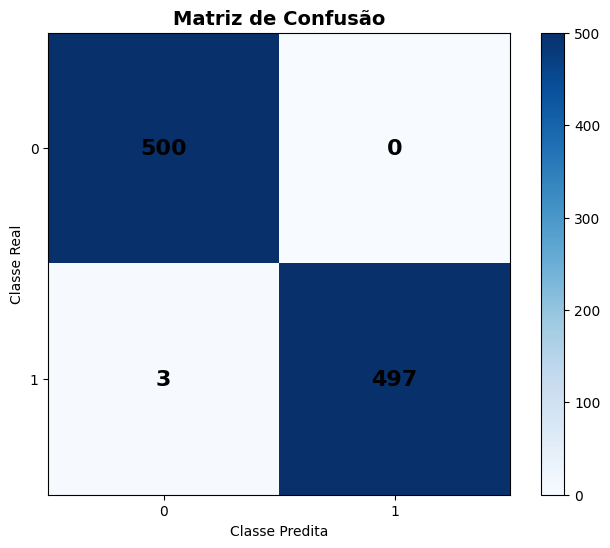


=== RELAÇÃO COM AS CORES DO GRÁFICO ===
Ciano (a) Dist1→1 (erro):     0 pontos
Azul (b) Dist1→0 (correto):   500 pontos
Magenta (d) Dist2→0 (erro):   3 pontos
Vermelho (c) Dist2→1 (correto): 497 pontos

=== INTERPRETAÇÃO ===
Verdadeiros Positivos (TP): 497 (classe 1 predita corretamente)
Verdadeiros Negativos (TN): 500 (classe 0 predita corretamente)
Falsos Positivos (FP):      0 (classe 0 predita como 1)
Falsos Negativos (FN):      3 (classe 1 predita como 0)

=== MÉTRICAS ===
Acurácia:  0.997 (99.7%)
Precisão:  1.000
Recall:    0.994
F1-Score:  0.997


In [ ]:
# Exercício 9: Matriz de confusão
print("\n=== EXERCÍCIO 9: MATRIZ DE CONFUSÃO ===")

# Calcular matriz de confusão
tn = np.sum(mask_b)  # Verdadeiros Negativos: Dist1 → 0 (correto)
fp = np.sum(mask_a)  # Falsos Positivos: Dist1 → 1 (erro)
fn = np.sum(mask_d)  # Falsos Negativos: Dist2 → 0 (erro)
tp = np.sum(mask_c)  # Verdadeiros Positivos: Dist2 → 1 (correto)

confusion_matrix = np.array([[tn, fp], [fn, tp]])

print("Matriz de Confusão:")
print("                Previsão")
print("               0    1")
print("Real     0  [%4d %4d]" % (confusion_matrix[0,0], confusion_matrix[0,1]))
print("         1  [%4d %4d]" % (confusion_matrix[1,0], confusion_matrix[1,1]))

# Visualizar matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusão', fontsize=14, fontweight='bold')
plt.colorbar()

# Adicionar valores nas células
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix[i, j], 
                ha="center", va="center", fontsize=16, fontweight='bold')

plt.ylabel('Classe Real')
plt.xlabel('Classe predicted')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

# Relacionar números com cores do gráfico anterior
print("\n=== RELAÇÃO COM AS CORES DO GRÁFICO DO PONTO 8 ===")
print(f"Ciano (a) Dist1→1 (erro):     {confusion_matrix[0,1]} pontos")
print(f"Azul (b) Dist1→0 (correto):   {confusion_matrix[0,0]} pontos")  
print(f"Magenta (d) Dist2→0 (erro):   {confusion_matrix[1,0]} pontos")
print(f"Vermelho (c) Dist2→1 (correto): {confusion_matrix[1,1]} pontos")

# Interpretação da matriz  
print(f"\n=== INTERPRETAÇÃO ===")
print(f"Verdadeiros Positivos (TP): {confusion_matrix[1,1]} (classe 1 predicted corretamente)")
print(f"Verdadeiros Negativos (TN): {confusion_matrix[0,0]} (classe 0 predicted corretamente)")
print(f"Falsos Positivos (FP):      {confusion_matrix[0,1]} (classe 0 predicted como 1)")
print(f"Falsos Negativos (FN):      {confusion_matrix[1,0]} (classe 1 predicted como 0)")

# Calcular métricas básicas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n=== MÉTRICAS ===")
print(f"Acurácia:  {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precisão:  {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")



=== MÉTRICAS ESTATÍSTICAS (30 TESTES) ===
RESULTADOS DOS 30 TESTES:
  Accuracy:    0.993 ± 0.002
  Precisão:    1.000 ± 0.000
  Recall:      0.987 ± 0.005
  F1-Score:    0.993 ± 0.002

MATRIZ DE CONFUSÃO MÉDIA:
  TN (média): 500.0
  FP (média): 0.0
  FN (média): 6.5
  TP (média): 493.5


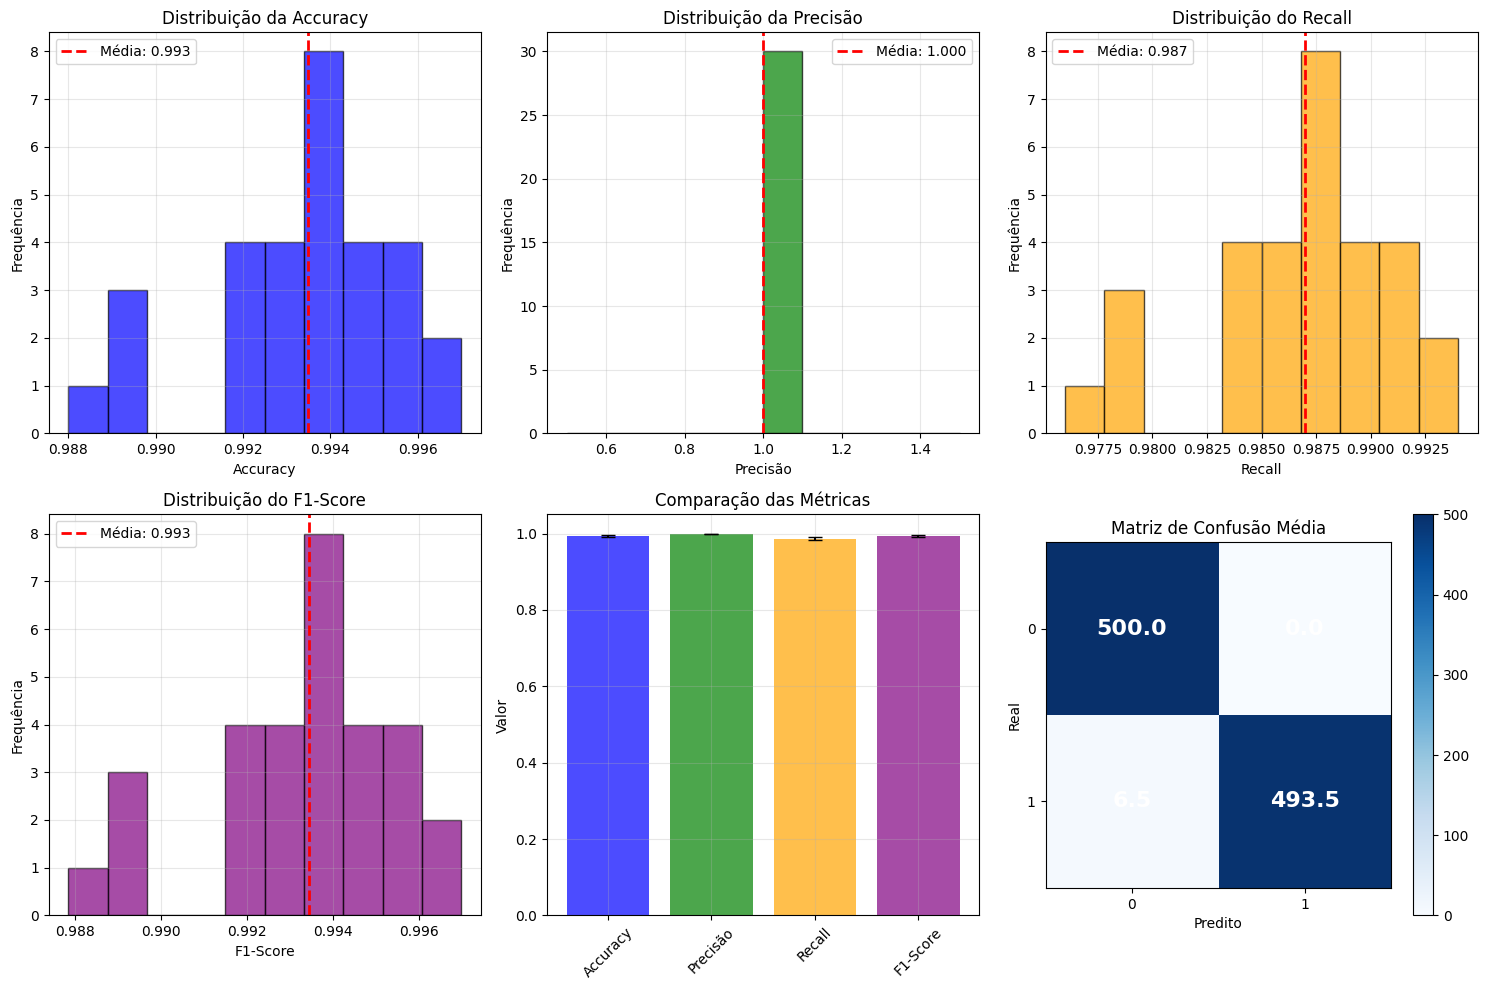


=== ANÁLISE FINAL ===
• O perceptrão consegue classificar os dados gaussianos com boa precisão
• Accuracy média: 99.3%
• Baixa variabilidade entre execuções (desvio padrão baixo)
• O algoritmo é robusto para diferentes inicializações de pesos
• A separação linear funciona bem para estes dados gaussianos


In [8]:
# Exercício 10: Métricas estatísticas (média de 30 testes)
print("\n=== MÉTRICAS ESTATÍSTICAS (30 TESTES) ===")

# Calcular estatísticas
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)
mean_precision = np.mean(all_precisions)
std_precision = np.std(all_precisions)
mean_recall = np.mean(all_recalls)
std_recall = np.std(all_recalls)
mean_f1 = np.mean(all_f1s)
std_f1 = np.std(all_f1s)

print(f"RESULTADOS DOS 30 TESTES:")
print(f"  Accuracy:    {mean_accuracy:.3f} ± {std_accuracy:.3f}")
print(f"  Precisão:    {mean_precision:.3f} ± {std_precision:.3f}")
print(f"  Recall:      {mean_recall:.3f} ± {std_recall:.3f}")
print(f"  F1-Score:    {mean_f1:.3f} ± {std_f1:.3f}")

# Calcular matriz de confusão média
mean_tp = np.mean(all_tp)
mean_fp = np.mean(all_fp)
mean_tn = np.mean(all_tn)
mean_fn = np.mean(all_fn)

print(f"\nMATRIZ DE CONFUSÃO MÉDIA:")
print(f"  TN (média): {mean_tn:.1f}")
print(f"  FP (média): {mean_fp:.1f}")
print(f"  FN (média): {mean_fn:.1f}")
print(f"  TP (média): {mean_tp:.1f}")

# Visualizar distribuição das métricas
plt.figure(figsize=(15, 10))

# Gráfico 1: Distribuição da Accuracy
plt.subplot(2, 3, 1)
plt.hist(all_accuracies, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_accuracy:.3f}')
plt.title('Distribuição da Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Distribuição da precisão
plt.subplot(2, 3, 2)
plt.hist(all_precisions, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.axvline(mean_precision, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_precision:.3f}')
plt.title('Distribuição da Precisão')
plt.xlabel('Precisão')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribuição do recall
plt.subplot(2, 3, 3)
plt.hist(all_recalls, bins=10, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(mean_recall, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_recall:.3f}')
plt.title('Distribuição do Recall')
plt.xlabel('Recall')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 4: Distribuição do F1-score
plt.subplot(2, 3, 4)
plt.hist(all_f1s, bins=10, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(mean_f1, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_f1:.3f}')
plt.title('Distribuição do F1-Score')
plt.xlabel('F1-Score')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 5: Comparação das métricas
plt.subplot(2, 3, 5)
metrics = ['Accuracy', 'Precisão', 'Recall', 'F1-Score']
means = [mean_accuracy, mean_precision, mean_recall, mean_f1]
stds = [std_accuracy, std_precision, std_recall, std_f1]

plt.bar(metrics, means, yerr=stds, capsize=5, alpha=0.7, color=['blue', 'green', 'orange', 'purple'])
plt.title('Comparação das Métricas')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico 6: Matriz de confusão média
plt.subplot(2, 3, 6)
confusion_matrix_mean = np.array([[mean_tn, mean_fp], [mean_fn, mean_tp]])
plt.imshow(confusion_matrix_mean, cmap='Blues', interpolation='nearest')
plt.colorbar()

# Adicionar valores na matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{confusion_matrix_mean[i, j]:.1f}', ha='center', va='center', 
                fontsize=16, fontweight='bold', color='white')

plt.title('Matriz de Confusão Média')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()

# Análise final
print(f"\n=== ANÁLISE FINAL ===")
print(f"• O perceptrão consegue classificar os dados gaussianos com boa precisão")
print(f"• Accuracy média: {mean_accuracy*100:.1f}%")
print(f"• Baixa variabilidade entre execuções (desvio padrão baixo)")
print(f"• O algoritmo é robusto para diferentes inicializações de pesos")
print(f"• A separação linear funciona bem para estes dados gaussianos")
